In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt

On of the algorithms for approximating $ \sqrt{S} $ is known as Heron's method, after the first-century Greek mathematician Hero of Alexandria who described the method in his AD 60 work *Metrica*. This method is also called the Babylonian method (not to be confused with the Babylonian method for approximating hypotenuses), although there is no evidence that the method was known to Babylonians.

Given a positive real number $ S $, let $ x_0 > 0 $ be any positive initial estimate. Heron's method consists in iteratively computing

$$x_{n+1} = \frac{1}{2} \left( x_n + \frac{S}{x_n} \right),$$

until the desired accuracy is achieved. The sequence \( \{x_n\} \) defined by this equation converges to 

$$\lim_{n \to \infty} x_n = \sqrt{S}.$$

This is equivalent to using Newton's method to solve $ x^2 - S = 0 $. This algorithm is quadratically convergent: the number of correct digits of $ x_n $ roughly doubles with each iteration.


In [159]:
def heron(n, S, start=1):
    """
    calculate the squared root of S using Heron's method, by doing n iteration
    """
    if n == 0:
        return start
    return 0.5 * (heron(n - 1, S) + (S / (heron(n - 1, S))))

In [39]:
S = 250
res = []
for n in range(1, 21):
    res.append(heron(n, S, 100))

In [62]:
def heron_iteration(S, start, end):
    res = []
    for n in range(start, end):
        res.append(heron(n, S))
    return res

In [135]:
def heron_plot(S, start, end, color=(0.1, 0.2, 0.5)):
    h_iterations = hanon_iteration(S, start, end)
    plt.plot(range(start, end),
             h_iterations,
             color=color)
    return h_iterations

In [230]:
def chain_heron_plot(t_start, t_end, r_start, r_end):
    if r_start < 2: 
        print("Lowest range is changed to 2")
        r_start = 2
    assert r_start < r_end, 'Range boundaries should be different!'
    assert t_start < t_end, 'Lower and upper targets cannot be equal!'
    
    plt.figure(figsize=(12, 7))

    # Generate N evenly spaced numbers from 0 to 1
    N = t_end - t_start
    numbers = np.linspace(0, 1, N)
    numbers2 = sorted(numbers, reverse=True)
    for t, c1, c2 in zip(range(t_start, t_end + 1), numbers, numbers2):

        data = heron_plot(t, r_start, r_end, (c1, 0.5, c2))

    for x, d in zip(range(r_start, r_end - 1), data):
        plt.text(x,
                 d * 1.03,
                 f'Iteration {x}',
                 rotation=90,
                 color=(c1, 0.5, c2))

    plt.suptitle('Heron Estimation of Square Root')
    plt.title(f'From {t_start} to {t_end} at max {r_end - 1} iterations')
    #plt.xlabel('Number of Iteration')
    plt.ylabel('Estimated Square Root')
    plt.yticks([])
    plt.grid(axis='x', which='major', linestyle='--')
    plt.xlim(r_start, r_end - 1)
    plt.ylim(t_start**0.5, max(data) + 4)
    plt.xticks(range(math.floor(r_start), math.ceil(r_end), 1))
    plt.tick_params(axis='x', colors='white')

    plt.show()

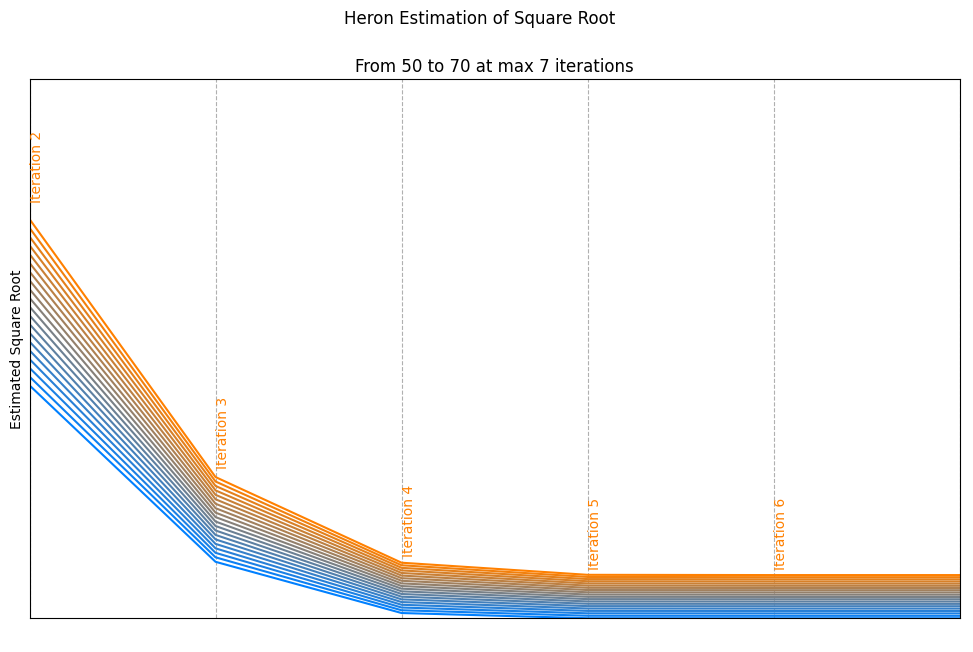

In [234]:
chain_heron_plot(50, 70, 2, 8)